In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
#If you want to generate random numbers using numpy library
#you have to use np.random module
experience = np.random.randint(low=2,high=11,size=500)

(array([61., 60., 75., 45.,  0., 59., 51., 39., 56., 54.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

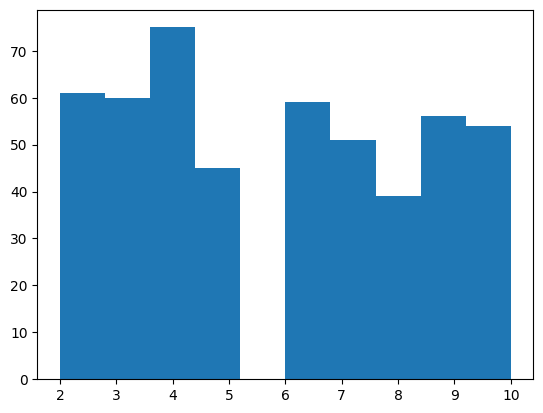

In [68]:
plt.hist(experience)

In [69]:
salary = 2*experience + 3 + np.random.normal(loc=0,scale=2,size=500)

In [70]:
salary

array([19.64604729,  6.60382005, 17.90113135, 13.44327179,  7.16157466,
        8.13546758,  8.54616806, 14.46974002,  6.90421859, 10.78213806,
       13.39857673, 14.41523492, 19.52833   , 16.40693605,  7.74043833,
       21.33471495, 13.58649718, 10.42625213, 19.23531165, 15.15274909,
       19.09712822, 21.22755605, 10.09689788, 20.10709482,  5.56802458,
        7.25881541, 16.66747343, 11.06809916, 23.63457165, 12.09273385,
        2.98670253, 24.3637994 , 16.28434282, 11.08224394, 14.26331734,
       21.26337626, 23.63995035,  8.15281062, 10.04127299, 21.16030674,
        7.757318  , 20.29147078, 20.12297103, 21.42819989, 10.20433601,
        7.05703228,  6.43314343, 21.7650787 , 23.77657842, 23.26423093,
       23.05390971, 20.43633191, 15.45722322,  8.27758851, 23.18438575,
       10.51620215, 27.19025508, 23.21119042, 17.39414205, 18.53074688,
       16.42637948, 13.21378607, 22.69087908, 15.01632929, 12.70919723,
       12.05431947, 10.57949379, 13.16983535,  9.57356262, 10.64

Text(0, 0.5, 'Salary (in Lakhs of Rupees), Y')

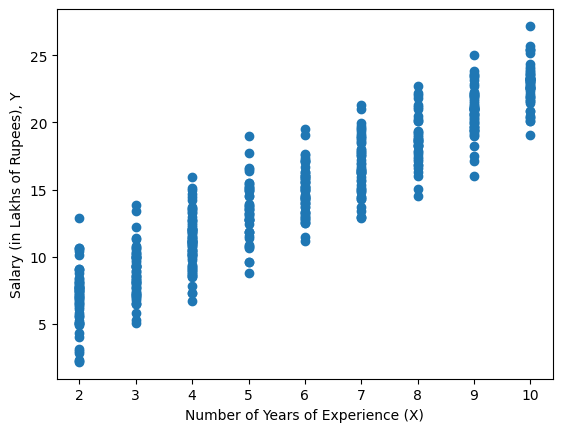

In [71]:
plt.scatter(experience,salary)
plt.xlabel("Number of Years of Experience (X)")
plt.ylabel("Salary (in Lakhs of Rupees), Y")

In [72]:
training_data = pd.DataFrame(data={"X (Experience)":experience,"Y (Salary)":salary})

In [73]:
training_data

,X (Experience),Y (Salary)
0,9,19.646047
1,2,6.603820
2,8,17.901131
3,5,13.443272
4,3,7.161575
...,...,...
495,8,20.279825
496,4,13.473267
497,7,14.273026
498,10,23.334577


In [74]:
X = np.array(training_data["X (Experience)"])
Y = np.array(training_data["Y (Salary)"])

In [75]:
def nll(theta0,theta1):

    X = np.array(training_data["X (Experience)"])
    mu_y_condition_x = (theta1*X) + theta0
    squared_error = (Y - mu_y_condition_x)**2
    mse = np.mean(squared_error)
    return (1/2)*mse

In [76]:
def del_by_del_theta(theta0_initial,theta1_initial):

    X = np.array(training_data["X (Experience)"])
    mu_y_condition_x = (theta1_initial*X) + theta0_initial
    error = (mu_y_condition_x - Y)
    error = np.reshape(error,(500,1))
    #or
    #error = error.reshape(500,1)
    #or
    #error = np.expand_dims(error,-1)
    error_transpose = np.transpose(error)
    X = np.expand_dims(X,-1)
    #print(X.shape,error_transpose.shape)
    del_by_del_theta1 = (1/error.shape[0])*np.matmul(error_transpose,X)
    del_by_del_theta0 = np.mean(error)

    return [del_by_del_theta0, del_by_del_theta1]

In [79]:
epsilon = 10**(-2)
epoch_counter = 0
theta0_initial = 0
theta1_initial = 0
tol = 10**(-8)

while True:

    initial_gradients = del_by_del_theta(theta0_initial,theta1_initial)

    theta0_final = theta0_initial - (epsilon * initial_gradients[0])
    theta1_final = theta1_initial - (epsilon * initial_gradients[1])

    nll_initial_value = nll(theta0_initial,theta1_initial)
    nll_final_value = nll(theta0_final,theta1_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1

    theta0_initial = theta0_final
    theta1_initial = theta1_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

Epoch # 1, NLL Value = 120.59509249367201
Epoch # 2, NLL Value = 43.34508620502422
Epoch # 3, NLL Value = 16.600619143231082
Epoch # 4, NLL Value = 7.340636272274713
Epoch # 5, NLL Value = 4.133600023752371
Epoch # 6, NLL Value = 3.0220338315488386
Epoch # 7, NLL Value = 2.635901444062299
Epoch # 8, NLL Value = 2.500910888384426
Epoch # 9, NLL Value = 2.4528673205698333
Epoch # 10, NLL Value = 2.434928219994034
Epoch # 11, NLL Value = 2.4274152970289133
Epoch # 12, NLL Value = 2.4235161230372606
Epoch # 13, NLL Value = 2.4208722934731295
Epoch # 14, NLL Value = 2.4186673395395997
Epoch # 15, NLL Value = 2.416618594220525
Epoch # 16, NLL Value = 2.4146281870379775
Epoch # 17, NLL Value = 2.4126622221542884
Epoch # 18, NLL Value = 2.410708951117671
Epoch # 19, NLL Value = 2.408764292712086
Epoch # 20, NLL Value = 2.4068268200833445
Epoch # 21, NLL Value = 2.4048960253353964
Epoch # 22, NLL Value = 2.4029717187518917
Epoch # 23, NLL Value = 2.401053820812939
Epoch # 24, NLL Value = 2.3991

In [80]:
theta1_final

array([[1.98217897]])

In [81]:
theta0_final

3.0430829368100483

In [82]:
predicted_salary = (theta1_final*5) + theta0_final

In [83]:
predicted_salary

array([[12.95397778]])